Вначале импортируем библиотеки и данные:

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

all_data = pd.read_csv('Materials/forest_dataset.csv')
all_data.head()

labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

А также подберем параметры для логистической регрессии:

In [25]:
clf = LogisticRegression(solver='saga')

param_grid = {
    'C': np.arange(1, 5),
    'penalty': ['l1', 'l2'],
}

search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

search.fit(feature_matrix, labels)

/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr

GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4]), 'penalty': ['l1', 'l2']},
             scoring='accuracy')

# Домашняя работа

Качество классификации/регрессии по методу k ближайших соседей зависит от нескольких параметров:
* количество соседей `n_neighbors`
* метрика расстояния между объектами `metric`
* веса соседей (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем меньше его "голос" учитывается) `weights`

Дальше обучим `KNeighborsClassifier` на датасете.

In [4]:
clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='uniform')
clf.fit(train_feature_matrix, train_labels)
y_pred = clf.predict(test_feature_matrix)

print("Accuracy:", accuracy_score(test_labels, y_pred))

Accuracy: 0.7365


Теперь выберем оптимальные параметры нашей модели:

* Итерация по интервалу от `1` до `10` для параметра количества соседей
* Попробуем использовать разные метрики: `['manhattan', 'euclidean']`
* Попробуем использовать разные стратегии расчета весов: `[‘uniform’, ‘distance’]`


In [5]:
params = {
    'n_neighbors': range(1, 11),
    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance']
}

clf_grid = GridSearchCV(clf, params, cv=5, scoring='accuracy', n_jobs=-1)
clf_grid.fit(train_feature_matrix, train_labels)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='euclidean'),
             n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': range(1, 11),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Теперь, после перебора всех параметров, посмотрим на лучшие из них:

In [9]:
for i in clf_grid.best_params_:
    print(f"{i.capitalize()}: {clf_grid.best_params_[i]}")

Metric: manhattan
N_neighbors: 4
Weights: distance


Точность при этих параметрах:

In [10]:
optimal_clf = clf_grid.best_estimator_
optimal_clf.fit(train_feature_matrix, train_labels)
pred_prob = optimal_clf.predict_proba(test_feature_matrix)

y_pred = optimal_clf.predict(test_feature_matrix)
print("Accuracy of the best model:", accuracy_score(test_labels, y_pred))

Accuracy of the best model: 0.785


В самом начале была точность 0.7365 на каких-то параметрах, и сейчас она больше: 0.785.

Теперь построим график, на котором будет видно, как предсказанные вероятности классов совпадают с реальными вероятностями классов:

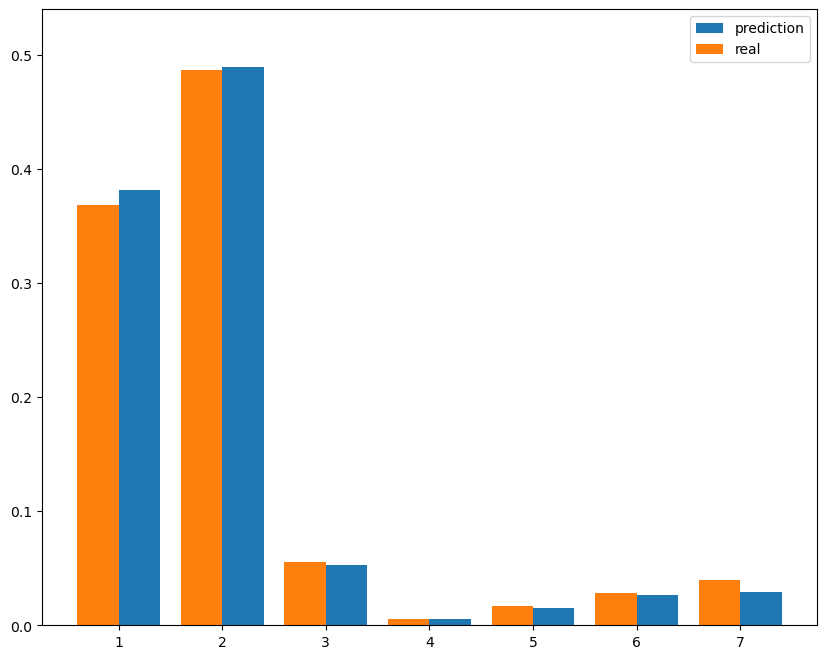

In [11]:
unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()

## Вывод:

Каков показатель качества модели на тестовой выборке? Сравните его с качеством логистической регрессии. Какая модель лучше? Почему? Каковы преимущества и недостатки метода k ближайших соседей?Постройте ROC-кривую для метода k ближайших соседей. Вычислите площадь под ROC-кривой (AUC-ROC).










Точность лучшей kNN модели на тестовой выборке:

In [ ]:
y_pred = optimal_clf.predict(test_feature_matrix)
print("Accuracy of the best kNN model:", accuracy_score(test_labels, y_pred))

Accuracy of the best model: 0.785


Точность модели при логистической регрессии:

In [27]:
print("Best parameters of logistic regression:")
for i in search.best_params_:
    print(f"{i.capitalize()}: {search.best_params_[i]}")
print("\n")

print("Accuracy of logistic regression:", accuracy_score(labels, search.best_estimator_.predict(feature_matrix)))


Best parameters of logistic regression:
C: 2
Penalty: l1


Accuracy of logistic regression: 0.642


Модель kNN лучше, так как ее точность на тестовой выборке выше.

*Преимущества метода k ближайших соседей:*
- Простая реализация и легкая интерпретация
- Подходит для задач классификации и регрессии
- Эффективность работает в нелинейных задачах, но не для больших размерностей

*Недостатки метода k ближайших соседей:*
- Чувствительность к выбросам и масштабу данных
- Требует больших вычислительных ресурсов
- Необходимость хранить всю обучающую выборку (неэффективность по памяти)
- Важность правильного выбора параметров



Построим ROC-кривую для метода k ближайших соседей:

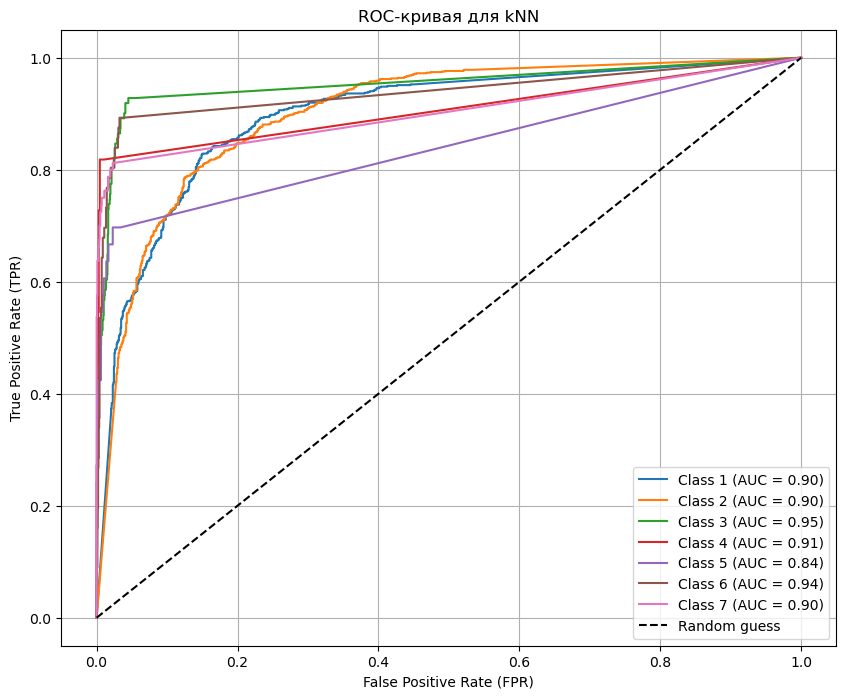

In [31]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_test_bin = label_binarize(test_labels, classes=np.unique(test_labels))

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

macro_roc_auc = roc_auc_score(y_test_bin, pred_prob, average='macro')

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая для kNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
